<a href="https://colab.research.google.com/github/Tanukashyap28/LinearRegressionHandson/blob/main/Hands_on_implementation_of_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import all required framework


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load the dataset
data=pd.read_csv("/content/Housing.csv")

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(545, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


mean is not 0 and also standard deviation is not 1 there here we f=get to know oue data is not in normal form or standard form

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# covert object to categorical datatype
data["mainroad"]=data["mainroad"].astype("category")
data["guestroom"] = data["guestroom"].astype("category")
data["basement"]=data["basement"].astype("category")
data["hotwaterheating"] = data["hotwaterheating"].astype("category")
data["airconditioning"]=data["airconditioning"].astype("category")
data["furnishingstatus"]=data["furnishingstatus"].astype("category")
data["prefarea"] = data["prefarea"].astype("category")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [ ]:
pd.get_dummies(data)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,False,True,True,False,...,True,True,False,True,False,True,False,False,False,True
541,1767150,2400,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
542,1750000,3620,2,1,1,0,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
543,1750000,2910,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False


In [ ]:
dataframe=pd.get_dummies(data,drop_first=True)
dataframe

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [ ]:
dataframe.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


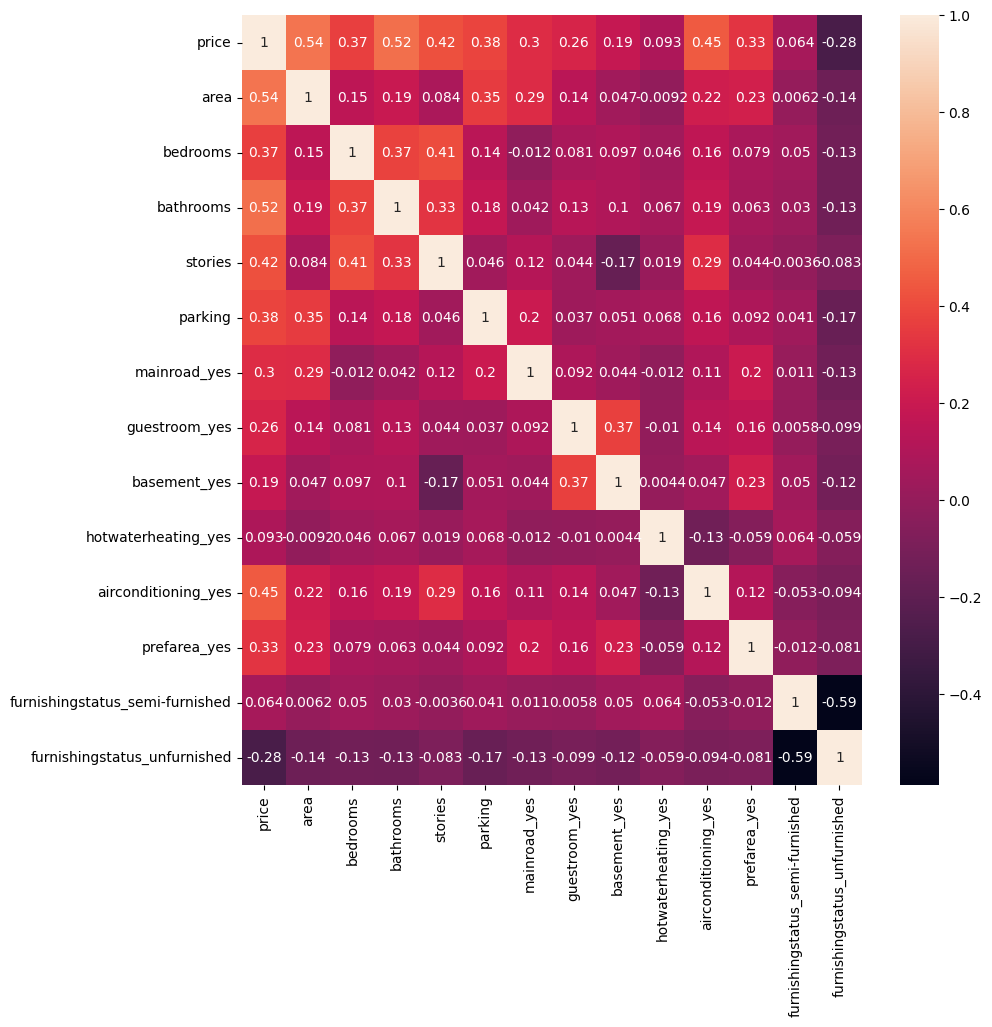

In [ ]:
# feature selection technique
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.corr(),annot=True)
plt.show()

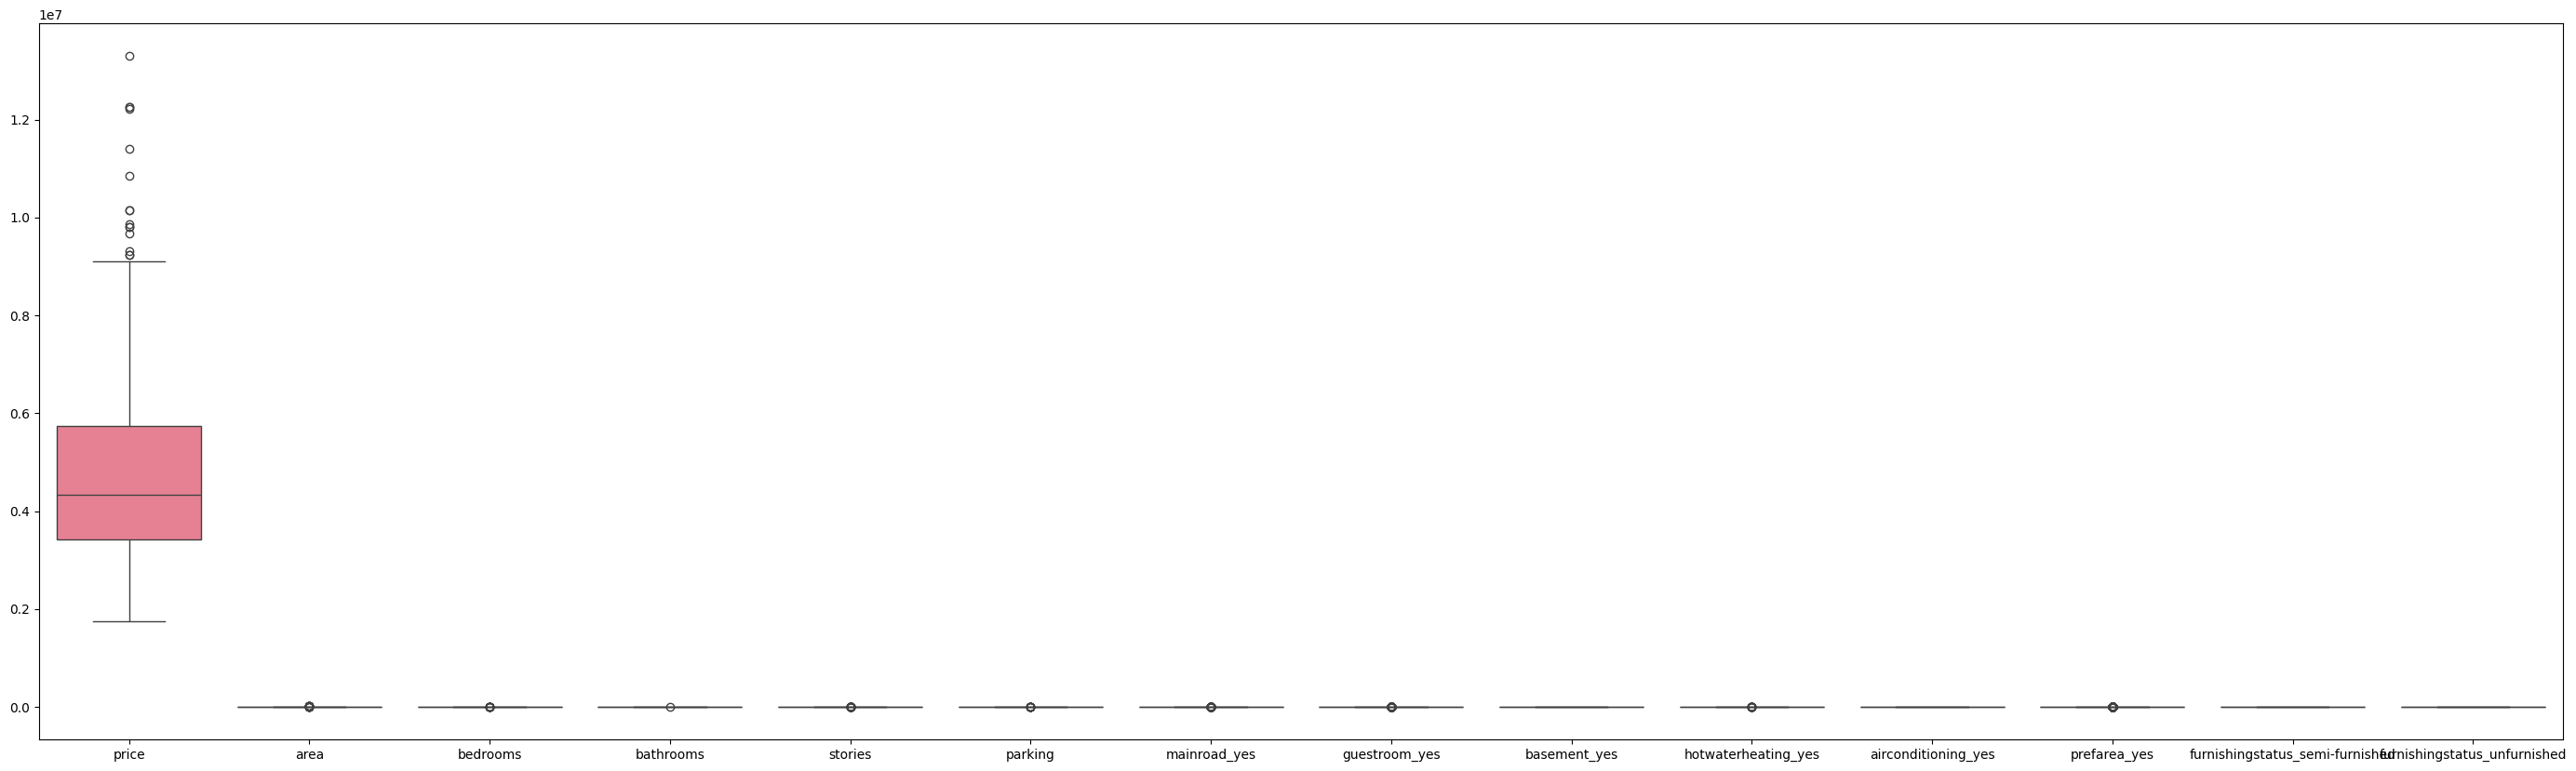

In [ ]:
# boxplot for outlier detection
plt.figure(figsize=(35,10))
sns.boxplot(data=dataframe)
plt.show()


In [ ]:
# scaling(all values will range closer )
# inside z_score formula used for fit_transform
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
dataframe[["area","bedrooms","bathrooms","stories","parking"]]=scaler.fit_transform(dataframe[["area","bedrooms","bathrooms","stories","parking"]])

In [ ]:
dataframe.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692,True,False,False,False,True,True,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409,True,False,False,False,True,False,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692,True,False,True,False,False,True,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409,True,False,True,False,True,True,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,False,False,False


In [ ]:
# model preparation (split data in train and split)
from sklearn.model_selection import train_test_split



In [ ]:
# split dataframe in input and target column
x=dataframe.drop("price",axis=1)
y=dataframe["price"]

In [ ]:
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)

In [ ]:
x_train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
152,0.115056,2.759560,-0.570187,0.224410,-0.805741,True,True,True,False,True,True,False,False
456,-1.269535,0.047278,-0.570187,-0.929397,-0.805741,True,False,False,False,False,True,True,False
30,1.072094,0.047278,1.421812,2.532024,1.517692,True,False,False,False,True,False,False,True
467,-0.881185,0.047278,-0.570187,0.224410,1.517692,True,False,False,False,False,False,True,False
498,-1.453102,-1.308863,-0.570187,0.224410,-0.805741,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.640850,0.047278,-0.570187,-0.929397,1.517692,True,True,True,False,False,True,False,False
84,-0.641349,0.047278,-0.570187,0.224410,1.517692,True,False,False,True,False,False,True,False
96,1.775458,0.047278,-0.570187,-0.929397,0.355976,True,False,True,False,False,True,False,False
173,0.068934,1.403419,1.421812,-0.929397,-0.805741,True,False,False,False,True,True,False,True


In [ ]:
x_test

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
302,-1.386224,0.047278,-0.570187,1.378217,0.355976,True,False,False,False,False,True,False,True
266,-0.124780,0.047278,-0.570187,-0.929397,1.517692,True,False,False,False,False,True,False,True
159,-0.922695,0.047278,1.421812,-0.929397,-0.805741,True,True,True,False,True,False,False,False
258,-0.512207,0.047278,-0.570187,0.224410,0.355976,True,False,False,False,False,False,True,False
115,1.314236,0.047278,-0.570187,-0.929397,1.517692,True,True,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,-0.908859,-1.308863,1.421812,-0.929397,1.517692,True,False,True,False,False,False,True,False
157,-1.076283,1.403419,1.421812,0.224410,0.355976,False,True,True,False,False,False,False,False
424,-0.945757,0.047278,-0.570187,0.224410,-0.805741,False,False,True,False,False,False,True,False
319,-0.991879,1.403419,-0.570187,1.378217,1.517692,True,False,True,False,True,False,True,False


In [ ]:
y_train

,price
152,5565000
456,3118850
30,8400000
467,3010000
498,2660000
...,...
120,5950000
84,6510000
96,6300000
173,5250000


In [ ]:
y_test

,price
302,4200000
266,4403000
159,5460000
258,4480000
115,6020000
...,...
341,3850000
157,5495000
424,3360000
319,4060000


In [ ]:
# model training
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
# prediction
y_pred= regression.predict(x_test)

In [ ]:
y_pred

array([4101489.26342856, 4239148.10322114, 5561206.5574739 ,
       3916949.9174789 , 6982227.47967786, 2716123.60867823,
       5708390.73598415, 3194558.5066096 , 4279830.79114619,
       6699131.12766905, 2433705.84135668, 4064882.51867112,
       2975567.20450659, 2578492.95881584, 3134364.07673909,
       5201024.22022999, 2905450.54625914, 4817592.95758354,
       6393062.73192001, 4356712.71865986, 3823538.35682534,
       5522549.77155971, 3318345.03934796, 5865367.22115118,
       2821974.57896012, 5741357.55677583, 6006820.06395417,
       2587515.14877588, 5836179.75986404, 4131069.3845164 ,
       2857165.40754813, 4190207.19036564, 4679620.54604448,
       2734389.64581229, 6698213.72474788, 3760464.11651108,
       2092537.33204854, 3913492.86931399, 3198557.964116  ,
       4848170.56591051, 7194092.90362519, 4695948.81046225,
       3579937.3656375 , 4359484.1577775 , 4093389.42374907,
       6439479.70960998, 6064076.80233967, 3883578.58928368,
       7234373.89947873,

In [ ]:
# model evaluation
# 1. mse
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(mse)

704787672561.8761


In [ ]:
regression.coef_

array([ 549460.06884477,   89569.04135792,  516656.34261514,
        366239.55413846,  249359.19646077,  458254.08916059,
        268823.97576603,  367278.25296967,  976577.59321261,
        923067.78042273,  635435.17185378,    6290.56845747,
       -386937.30344205])

In [ ]:
regression.intercept_

np.float64(3853244.828182186)

In [ ]:
# 2.rmse root mean squared error...means it is square root of mse
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

839516.3325164532


In [ ]:
# 3. r2_score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.6595139070998459


In [ ]:
x_test.shape


(109, 13)

In [ ]:
# 4.adjusted r2=1-((1-r2)(n-1))/n-p-1-->n is no. of records,p is no. of features or dimension

adjusted_r2=1-((1-score)*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1)
print(adjusted_r2)

0.6129210733345616


In [ ]:
import statsmodels.formula.api as smf
model_smf = smf.ols(formula="price ~ stories+area",data=dataframe).fit()
model_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     204.0
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           9.07e-67
Time:                        12:23:07   Log-Likelihood:                -8490.6
No. Observations:                 545   AIC:                         1.699e+04
Df Residuals:                     542   BIC:                         1.700e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.767e+06   6.06e+04     78.618      0.000    4.65e+06    4.89e+06
stories     7.071e+05   6.08e+04     11.620      0.000    5.88e+05    8.27e+05
area        9.422e+05   6.08e+04     15.486      0.000    8.23e+05    1.06e+06
==============================================================================
Omnibus:                      116.341   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.556
Skew:                           1.071   Prob(JB):                     4.02e-65
Kurtosis:                       5.911   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# save model using pickle(here we storing intercept and coef)
import pickle
pickle.dump(regression,open("model.pk1","wb"))

In [ ]:
# load model and predict
model_pickle=pickle.load(open("model.pk1","rb"))
model_pickle.predict(x_test)

array([4101489.26342856, 4239148.10322114, 5561206.5574739 ,
       3916949.9174789 , 6982227.47967786, 2716123.60867823,
       5708390.73598415, 3194558.5066096 , 4279830.79114619,
       6699131.12766905, 2433705.84135668, 4064882.51867112,
       2975567.20450659, 2578492.95881584, 3134364.07673909,
       5201024.22022999, 2905450.54625914, 4817592.95758354,
       6393062.73192001, 4356712.71865986, 3823538.35682534,
       5522549.77155971, 3318345.03934796, 5865367.22115118,
       2821974.57896012, 5741357.55677583, 6006820.06395417,
       2587515.14877588, 5836179.75986404, 4131069.3845164 ,
       2857165.40754813, 4190207.19036564, 4679620.54604448,
       2734389.64581229, 6698213.72474788, 3760464.11651108,
       2092537.33204854, 3913492.86931399, 3198557.964116  ,
       4848170.56591051, 7194092.90362519, 4695948.81046225,
       3579937.3656375 , 4359484.1577775 , 4093389.42374907,
       6439479.70960998, 6064076.80233967, 3883578.58928368,
       7234373.89947873,

In [ ]:
# applying regularization technique : lasso,ridge,elasticnet
from sklearn.linear_model import Lasso,Ridge,ElasticNet
Lasso_Regression= Lasso()
Ridge_Regression= Ridge()
Elasticnet_Regression= ElasticNet()

In [ ]:
Lasso_Regression.fit(x_train,y_train)
Ridge_Regression.fit(x_train,y_train)
Elasticnet_Regression.fit(x_train,y_train)

ElasticNet()

In [ ]:
# prediction
lasso_predict=Lasso_Regression.predict(x_test)
print(lasso_predict)
print()

ridge_predict=Ridge_Regression.predict(x_test)
print(ridge_predict)
print()

elasticnet_predict=Elasticnet_Regression.predict(x_test)
print(elasticnet_predict)

[4101490.38911594 4239149.59447161 5561199.40234479 3916951.99091762
 6982214.36057451 2716128.48199696 5708390.14418293 3194559.66035494
 4279832.97933234 6699134.93137471 2433711.81746583 4064882.35938746
 2975572.71022722 2578497.4692108  3134369.13681505 5201015.22915827
 2905458.42398744 4817600.22506384 6393052.92058253 4356710.55040937
 3823543.28865774 5522547.77846399 3318351.16749208 5865367.85291228
 2821973.78187898 5741329.13966753 6006816.22783963 2587521.36071238
 5836181.47677616 4131069.75154676 2857173.65960903 4190213.62621029
 4679623.1170826  2734397.36028588 6698205.00732308 3760464.58920304
 2092549.07079638 3913496.4342877  3198562.37404529 4848164.64467135
 7194089.67139062 4695950.13010511 3579939.57810378 4359485.73105368
 4093390.74307347 6439469.3261998  6064051.48391162 3883577.75077797
 7234371.64579824 4889884.71207174 4427903.74795332 4102733.5253383
 3481312.86866716 3567456.69886092 4654044.77940526 3290577.1031777
 5609984.03140394 6208816.88533719 4

In [ ]:
# rmse of all 4 model
print("rmse of lasso",np.sqrt(mean_squared_error(y_test,lasso_predict)))
print("rmse of ridge",np.sqrt(mean_squared_error(y_test,ridge_predict)))
print("rmse of elasticnet",np.sqrt(mean_squared_error(y_test,elasticnet_predict)))
print("rmse of linearRegression",np.sqrt(mean_squared_error(y_test,y_pred)))

rmse of lasso 839514.8837006752
rmse of ridge 837316.038837753
rmse of elasticnet 862050.1833135388
rmse of linearRegression 839516.3325164532


In [ ]:
# r2_score of all
print("r2 score of lasso",r2_score(y_test,lasso_predict))
print("r2 score of ridge",r2_score(y_test,ridge_predict))
print("r2 score of elasticnet",r2_score(y_test,elasticnet_predict))
print("r2 score of linearRegression",r2_score(y_test,y_pred))

r2 score of lasso 0.6595150823031835
r2 score of ridge 0.661296332569136
r2 score of elasticnet 0.6409903058370403
r2 score of linearRegression 0.6595139070998459
